Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:



1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)) (1p.)


2. Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)



In [1]:
df = read.csv("matrix_multiplication.csv")
df

label,size,total_time
<chr>,<int>,<dbl>
BLAS,50,0.0000098
better,50,0.0002829
naive,50,0.0002578
BLAS,50,0.0000102
better,50,0.0003044
naive,50,0.0002590
BLAS,50,0.0000095
better,50,0.0002752
naive,50,0.0002657


3. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) (1p.)


4. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 (1p.)

In [2]:
grouped_df = aggregate( total_time ~ size:label, data=df, FUN=mean)

In [3]:
grouped_df$sd = aggregate( total_time ~ size:label, data=df, FUN=sd)$total_time

In [4]:
grouped_df

size,label,total_time,sd
<int>,<chr>,<dbl>,<dbl>
5,better,0.00000078,6.779053e-07
10,better,0.00000257,6.749486e-08
15,better,0.00000813,1.251666e-07
20,better,0.00001850,6.666667e-08
25,better,0.00003580,1.490712e-07
30,better,0.00006119,4.228212e-07
35,better,0.00010024,3.852330e-06
40,better,0.00014879,1.588930e-05
45,better,0.00020573,6.915209e-06


In [5]:
library("ggplot2")

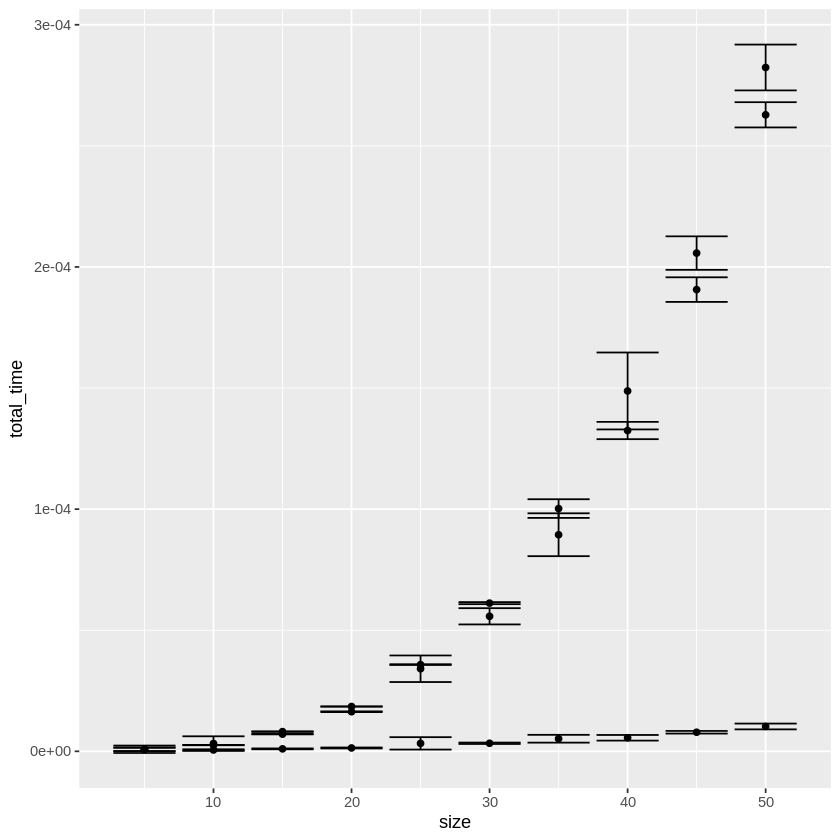

In [6]:
ggplot(grouped_df,aes(size, total_time)) + geom_point() + geom_errorbar(aes(ymin=total_time - sd, ymax=total_time + sd))

5. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. (1p.)


In [7]:
naive = grouped_df[grouped_df$label=="naive",]
naive2 = data.frame(x=naive["size"],y=naive["total_time"])


In [8]:
fit = lm(naive2$total_time ~ poly(naive2$size, 3, raw=TRUE), data=naive2)

In [9]:
newdata = data.frame(x = seq(0,50, length.out=10))

In [10]:
newdata$y = predict(fit, newdata)

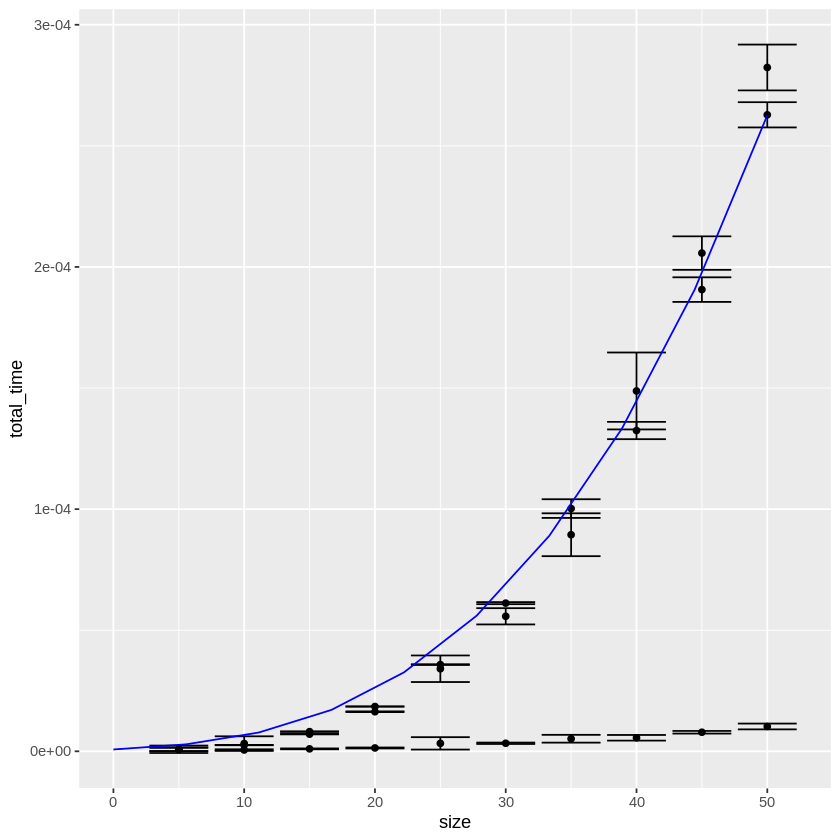

In [11]:
last_plot() + geom_line(data=newdata, aes(x,y), color="blue")

In [12]:
better = grouped_df[grouped_df$label=="better",]
better2 = data.frame(x=better["size"],y=better["total_time"])


In [13]:
fit = lm(better2$total_time ~ poly(better2$size, 3, raw=TRUE), data=better2)

In [14]:
newdata = data.frame(x = seq(0,50, length.out=10))

In [15]:
newdata$y = predict(fit, newdata)

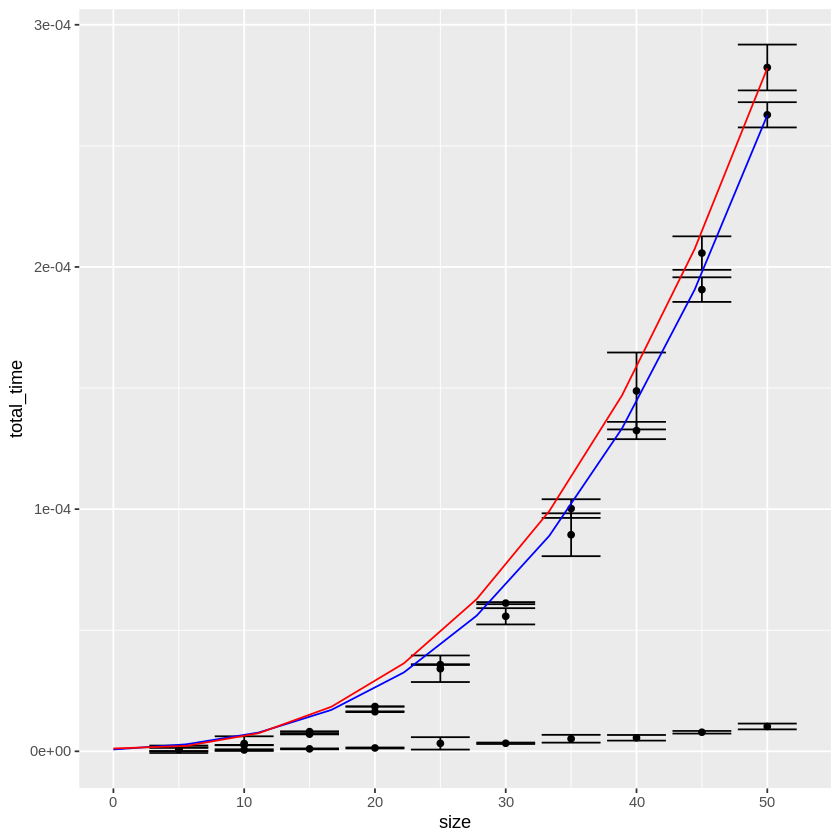

In [16]:
last_plot() + geom_line(data=newdata, aes(x,y), color="red")

In [17]:
BLAS = grouped_df[grouped_df$label=="BLAS",]
BLAS2 = data.frame(x=BLAS["size"],y=BLAS["total_time"])


In [18]:
fit = lm(BLAS2$total_time ~ poly(BLAS2$size, 3, raw=TRUE), data=BLAS2)

In [19]:
newdata = data.frame(x = seq(0,50, length.out=10))

In [20]:
newdata$y = predict(fit, newdata)

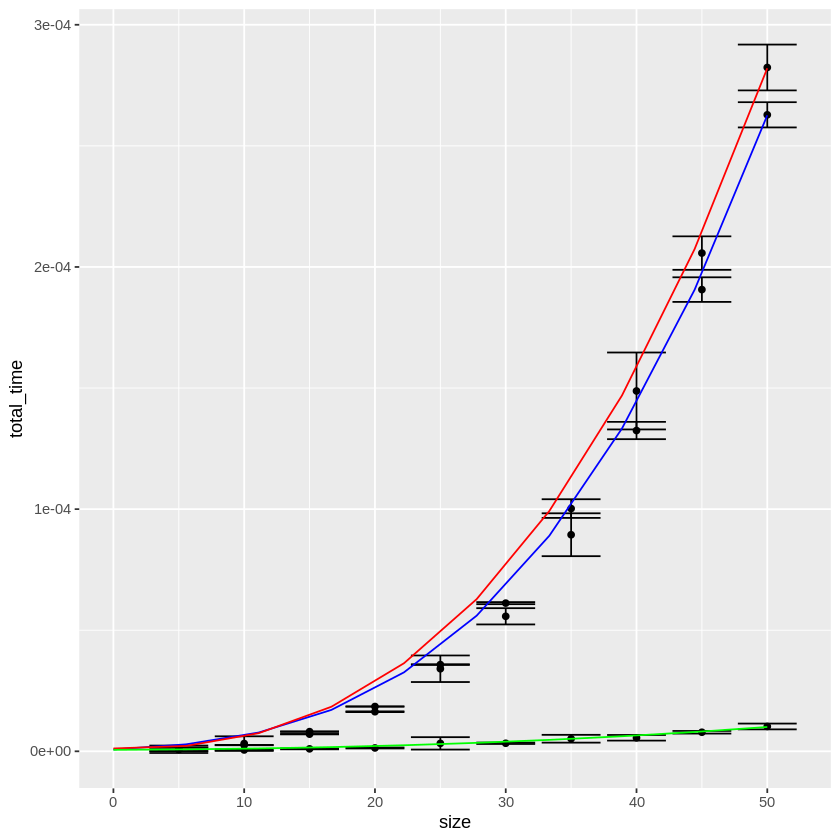

In [21]:
last_plot() + geom_line(data=newdata, aes(x,y), color="green")

6. Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem. Przykładowe źródło danych w GoogleDoc lub https://ourworldindata.org/explorers/coronavirus-data-explorer. Jak zmieniają się krzywe w zależności od wybranego okresu czasu. Porównać na wykresach co najmniej 2 dopasowania (2p.)

In [22]:
cov = read.csv("owid-covid-data.csv")
cov

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2020-02-24,1,1,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-25,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-26,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-27,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-28,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-29,1,0,0.143,NA,NA,0.000,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-03-01,1,0,0.143,NA,NA,0.000,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-03-02,1,0,0.000,NA,NA,0.000,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-03-03,2,1,0.143,NA,NA,0.000,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511


In [23]:
grouped_cov = aggregate( total_cases ~ date, data=cov, FUN=sum)

In [24]:
grouped_cov

date,total_cases
<chr>,<dbl>
2020-01-22,1671
2020-01-23,1965
2020-01-24,2825
2020-01-25,4302
2020-01-26,6357
2020-01-27,8785
2020-01-28,16742
2020-01-29,18511
2020-01-30,24715


In [25]:
data1 = grouped_cov[31:60,]
df1 = data.frame(x=seq(30,60, length.out=30),y=data1["total_cases"])

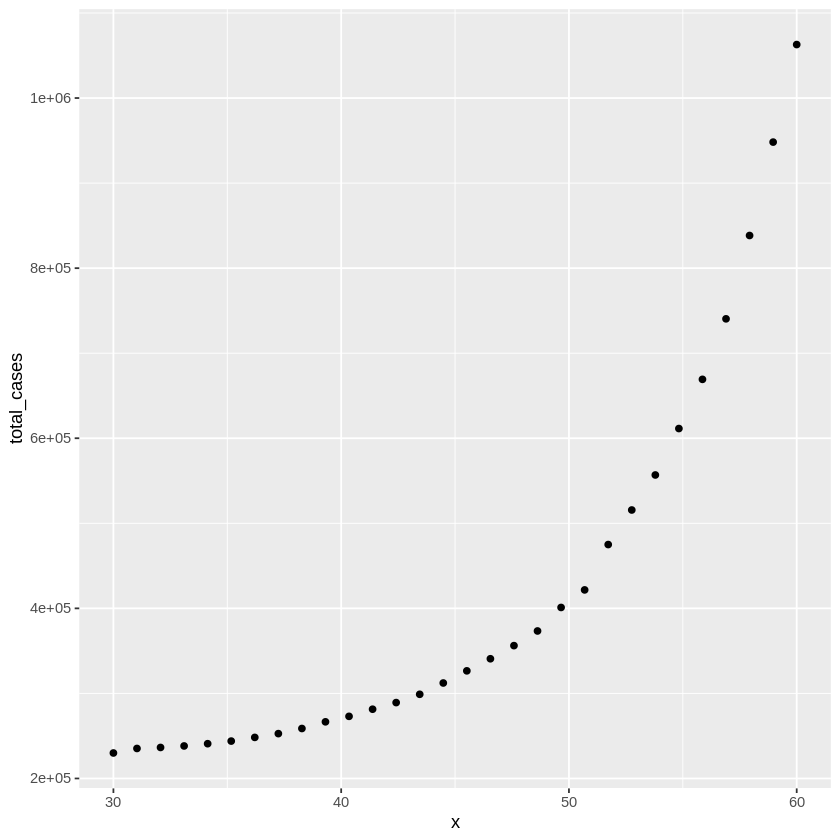

In [26]:
ggplot(df1,aes(x, total_cases)) + geom_point()

In [27]:
fit = lm(log(df1$total_cases) ~ df1$x)

In [28]:
coef(fit)

(Intercept)       df1$x 
10.67131409  0.04794959

In [29]:
newdata = data.frame(x = seq(30,60, length.out=30))

In [30]:
newdata$y = exp(coef(fit)[1])*exp(coef(fit)[2]*newdata$x)

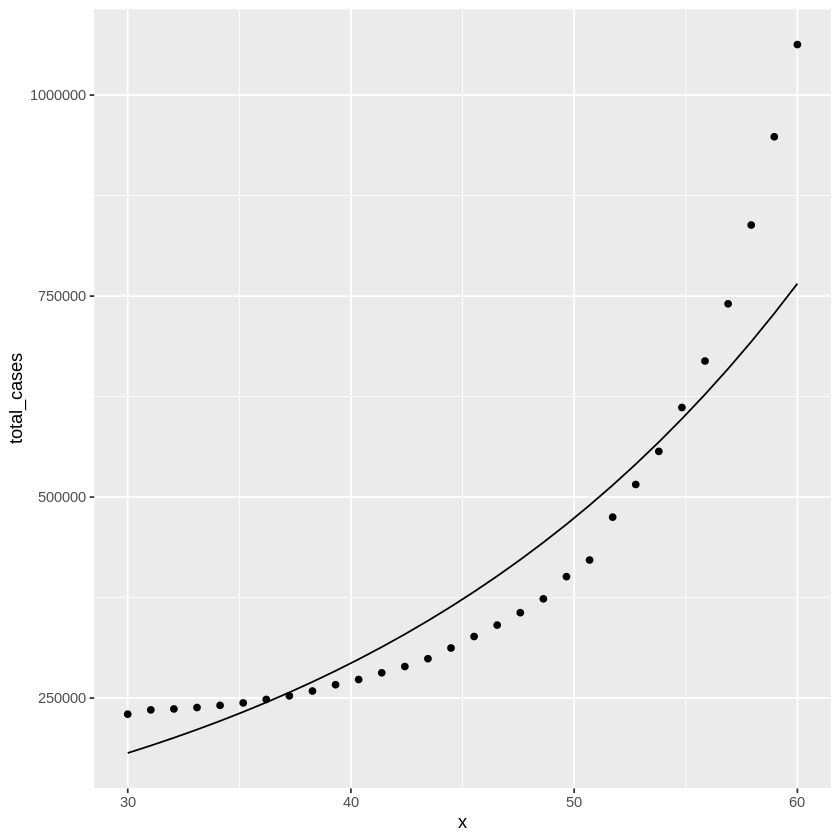

In [31]:
last_plot() + geom_line(data=newdata, aes(x,y))

In [32]:
data1 = grouped_cov[201:230,]
df1 = data.frame(x=seq(200,230, length.out=30),y=data1["total_cases"])

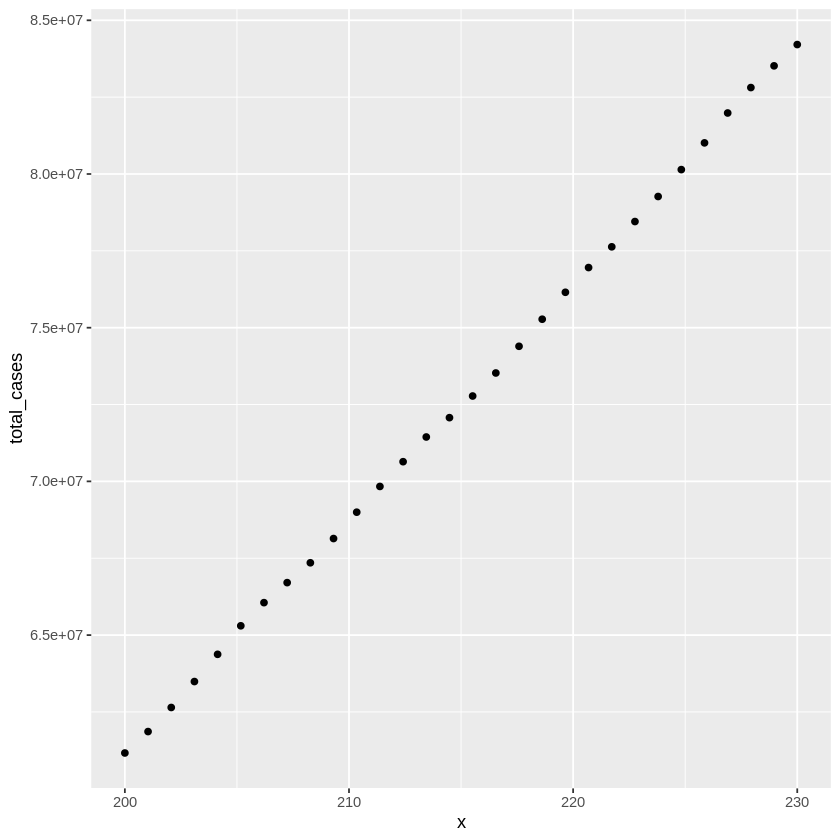

In [33]:
ggplot(df1,aes(x, total_cases)) + geom_point()

In [34]:
fit = lm(log(df1$total_cases) ~ df1$x)

In [35]:
coef(fit)

(Intercept)       df1$x 
15.81012463  0.01063218

In [36]:
newdata = data.frame(x = seq(200,230, length.out=30))

In [37]:
newdata$y = exp(coef(fit)[1])*exp(coef(fit)[2]*newdata$x)

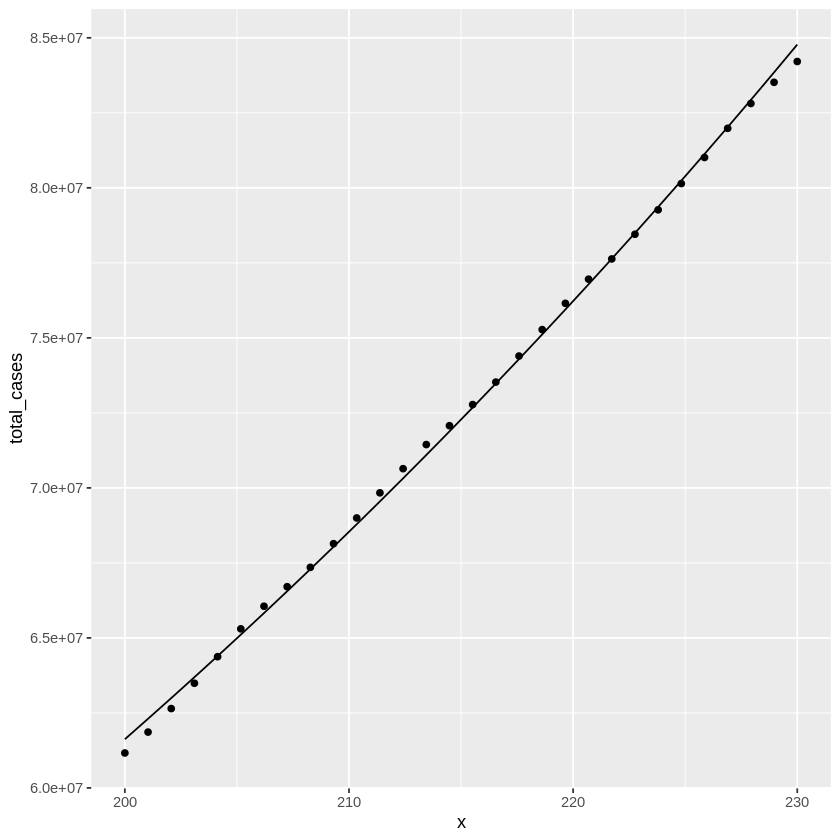

In [38]:
last_plot() + geom_line(data=newdata, aes(x,y))